<a href="https://colab.research.google.com/github/suppernazerke/fake_news_detection_system/blob/main/Fake_news_detection_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import json
import csv
import random
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
import pprint
import tensorflow.compat.v1 as tf
from tensorflow.python.framework import ops
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
tf.disable_eager_execution()
df = pd.read_csv("data_news.csv")
df_copy =df
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [3]:
df = df.drop(["Unnamed: 0"], axis=1)
df

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [4]:
le = preprocessing.LabelEncoder()
le.fit(df['label'])
df['label'] = le.transform(df['label'])
df

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,1
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,0
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,0
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",1


In [5]:
embedding_dim = 50
max_length = 54
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_size = 3000
test_portion = .1
title = []
text = []
labels = []
for x in range(training_size):
    title.append(df['title'][x])
    text.append(df['text'][x])
    labels.append(df['label'][x])
tokenizer1 = Tokenizer()
tokenizer1.fit_on_texts(title)
word_index1 = tokenizer1.word_index
vocab_size1 = len(word_index1)
sequences1 = tokenizer1.texts_to_sequences(title)
padded1 = pad_sequences(
    sequences1,  padding=padding_type, truncating=trunc_type)
split = int(test_portion * training_size)
training_sequences1 = padded1[split:training_size]
test_sequences1 = padded1[0:split]
test_labels = labels[0:split]
training_labels = labels[split:training_size]

embeddings_index = {}
with open('glove.6B.50d.txt') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
        
embeddings_matrix = np.zeros((vocab_size1+1, embedding_dim))
for word, i in word_index1.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector

In [6]:
model = tf.keras.Sequential([
	tf.keras.layers.Embedding(vocab_size1+1, embedding_dim,
							input_length=max_length, weights=[
								embeddings_matrix],
							trainable=False),
	tf.keras.layers.Dropout(0.2),
	tf.keras.layers.Conv1D(64, 5, activation='relu'),
	tf.keras.layers.MaxPooling1D(pool_size=4),
	tf.keras.layers.LSTM(64),
	tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',
			optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 54, 50)            377600    
                                                                 
 dropout (Dropout)           (None, 54, 50)            0         
                                                                 
 conv1d (Conv1D)             (None, 50, 64)            16064     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 12, 64)           0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                        

In [7]:
num_epochs = 50

training_padded = np.array(training_sequences1)
training_labels = np.array(training_labels)
testing_padded = np.array(test_sequences1)
testing_labels = np.array(test_labels)

history = model.fit(training_padded, training_labels,
					epochs=num_epochs,
					validation_data=(testing_padded,
									testing_labels),
					verbose=2)


Train on 2700 samples, validate on 300 samples
Epoch 1/50


/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2333: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


2700/2700 - 2s - loss: 0.6455 - accuracy: 0.6122 - val_loss: 0.5690 - val_accuracy: 0.7067 - 2s/epoch - 906us/sample
Epoch 2/50
2700/2700 - 1s - loss: 0.5816 - accuracy: 0.6911 - val_loss: 0.5524 - val_accuracy: 0.6900 - 1s/epoch - 538us/sample
Epoch 3/50
2700/2700 - 1s - loss: 0.5331 - accuracy: 0.7248 - val_loss: 0.5096 - val_accuracy: 0.7067 - 1s/epoch - 541us/sample
Epoch 4/50
2700/2700 - 2s - loss: 0.4915 - accuracy: 0.7526 - val_loss: 0.5077 - val_accuracy: 0.7567 - 2s/epoch - 743us/sample
Epoch 5/50
2700/2700 - 2s - loss: 0.4402 - accuracy: 0.7896 - val_loss: 0.5868 - val_accuracy: 0.7200 - 2s/epoch - 613us/sample
Epoch 6/50
2700/2700 - 1s - loss: 0.3964 - accuracy: 0.8204 - val_loss: 0.6019 - val_accuracy: 0.7000 - 1s/epoch - 552us/sample
Epoch 7/50
2700/2700 - 1s - loss: 0.3542 - accuracy: 0.8407 - val_loss: 0.5385 - val_accuracy: 0.7233 - 1s/epoch - 544us/sample
Epoch 8/50
2700/2700 - 2s - loss: 0.3314 - accuracy: 0.8533 - val_loss: 0.5622 - val_accuracy: 0.7533 - 2s/epoch - 

In [38]:
news = input("Please enter a text to check if it is a FAKE or REAL news\n")
sequences = tokenizer1.texts_to_sequences([news])[0]
sequences = pad_sequences([sequences], maxlen=54,
						padding=padding_type,
						truncating=trunc_type)
if(model.predict(sequences, verbose=0)[0][0] >= 0.5):
	print("This news is True")
else:
	print("This news is false")


Please enter a text to check if it is a FAKE or REAL news
Fred Rogers served as a sniper during the Vietnam War and had a large number of confirmed kills.
This news is false


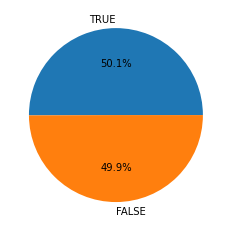

6335

In [33]:
import matplotlib.pyplot as plt
count = len(df[df["label"]==1])
count2= len(df[df["label"]==0])
cars = ["TRUE","FALSE"]

data = [count,count2]
plt.pie(data, labels =cars,autopct='%1.1f%%')
plt.show()
count+count2

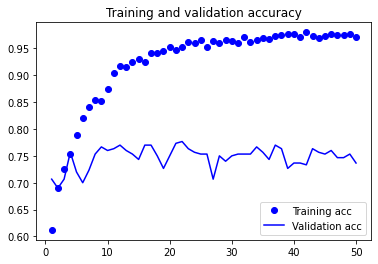

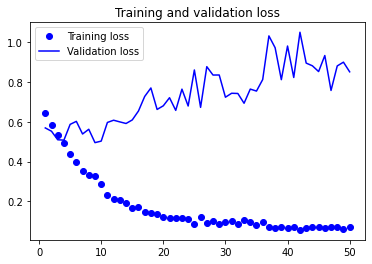

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()